<a href="https://colab.research.google.com/github/subbalakshmi3011/210701263_DEEP_LEARNING_CONCEPTS/blob/main/EXP7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape


In [ ]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Normalize the data to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [ ]:
# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))



In [ ]:
# Define the autoencoder architecture
input_dim = x_train.shape[1]
encoding_dim = 32  # Dimension of the latent space



In [ ]:
# Encoder
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)

In [ ]:
# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

In [ ]:
 #Autoencoder model
autoencoder = Model(input_img, decoded)

In [ ]:
# Encoder model
encoder = Model(input_img, encoded)

In [ ]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# Train the model
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.3874 - val_loss: 0.1918
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1802 - val_loss: 0.1523
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1489 - val_loss: 0.1329
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1307 - val_loss: 0.1197
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1183 - val_loss: 0.1108
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1105 - val_loss: 0.1048
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1051 - val_loss: 0.1007
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1010 - val_loss: 0.0979
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0986 - val_loss: 0.0959
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0970 - val_loss: 0.0948
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0958 - val_loss: 0.0940
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/

In [ ]:
# Evaluate the model
loss = autoencoder.evaluate(x_test, x_test)
print(f'Test loss: {loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0922
Test loss: 0.09146145731210709


In [ ]:
# Plot training & validation loss values
import matplotlib.pyplot as plt

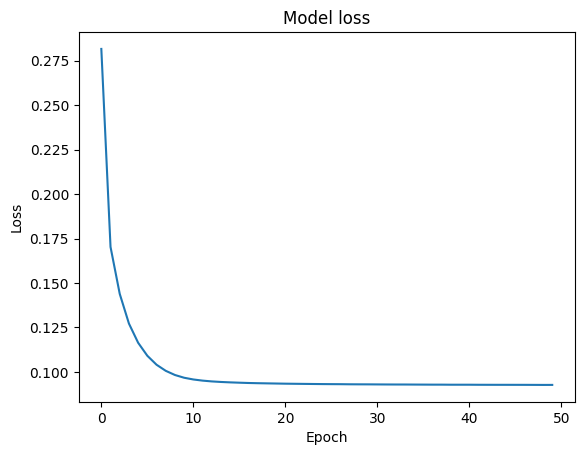

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [ ]:
# Use the encoder to encode and then decode the test images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

In [ ]:
# Visualize some of the original and reconstructed images
def plot_images(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

plot_images(x_test, decoded_imgs)

NameError: name 'x_test' is not defined